# Laboratorio 5
Alina Carías, Daniel Machic y Ariela Mishaan

**Github:** https://github.com/ArielaMishaanCohen/LAB5.git

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### Set de Control

6342
Matches buenos encontrados 1216


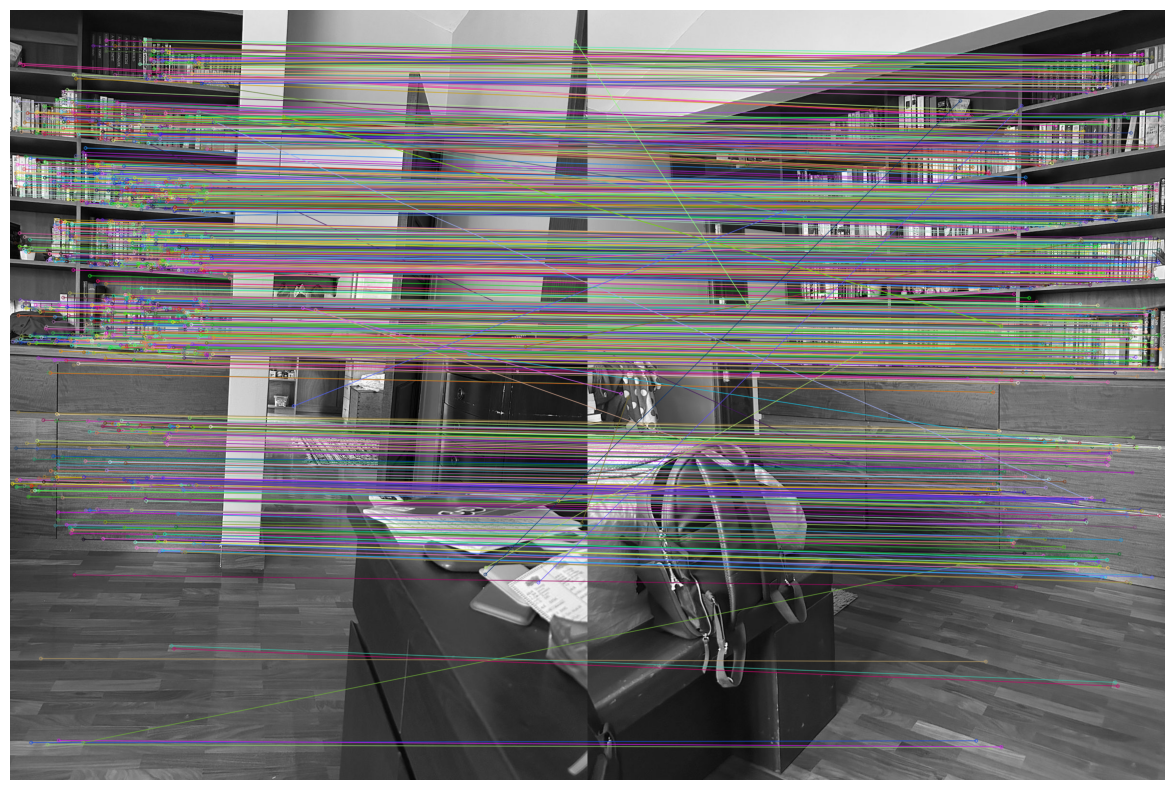

In [11]:
# cargar las imágenes
img_left = cv2.imread('control1.jpeg')
img_right = cv2.imread('control2.jpeg')

# convertir en grises
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# SIFT para detectar keypoints
sift = cv2.SIFT_create()
kp_left, des_left = sift.detectAndCompute(gray_left, None) #Train (destino)
kp_right, des_right = sift.detectAndCompute(gray_right, None) #Query (origen)

# Matching Flann
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# derecha es query
# izquierda es nuestro train
matches = flann.knnMatch(des_right, des_left, k = 2)
print(len(matches)) # son como 10 000 matches 

# lowe ratio test
good_matches = []
for m, n in matches: 
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Matches buenos encontrados {len(good_matches)}")

# visualización
img_matches = cv2.drawMatches(gray_right, kp_right, gray_left, kp_left, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.axis('off')
plt.show()  

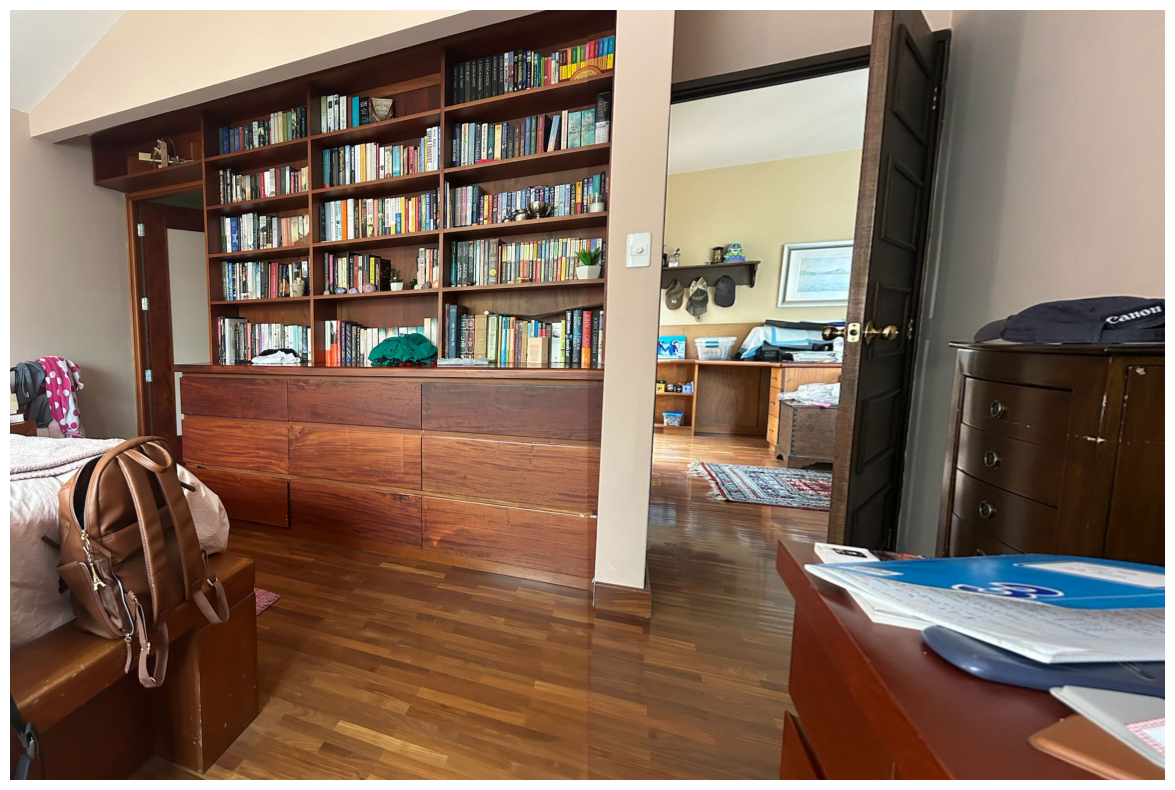

In [12]:
# homografía 

# extraer coordenadas de lso puntos 
src_pts = np.float32([kp_right[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_left[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# ransac
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# wrap * deformación
# calcular nuestro canvas / lienzo
h_left, w_left = img_left.shape[:2]
h_right, w_right = img_right.shape[:2]

# ancho = i1.w + i2.w
canvas_w = w_left + w_right
canvas_h = max(h_left, h_right)

# deformamos la imagen de la derecha. Como la base es la izquiera, la derecha se moverá hacia coorddenadas positivas
panorama = cv2.warpPerspective(img_right, M, (canvas_w, canvas_h))
panorama[0:h_left, 0:w_left] = img_left

dst_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off')
plt.show()

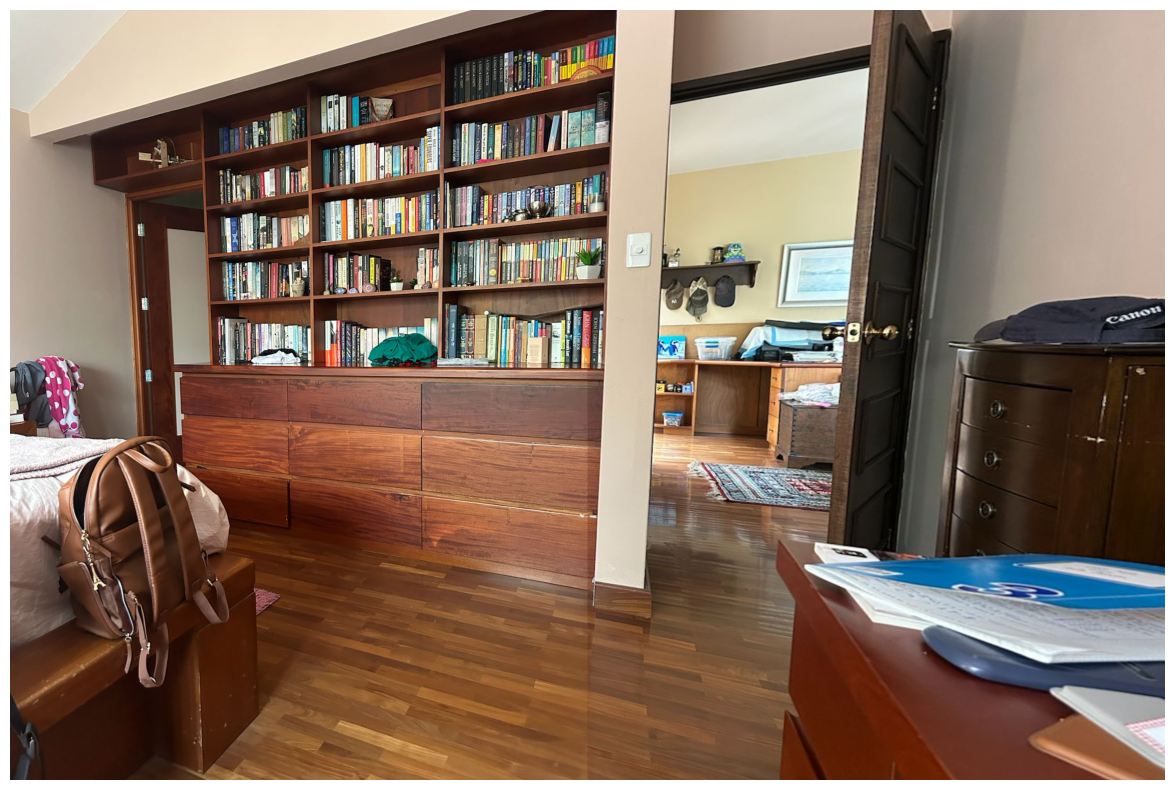

In [13]:
panorama_gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(panorama_gray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
left_on_canvas = np.zeros_like(panorama)
left_on_canvas[0:h_left, 0:w_left] = img_left

img_left_part = cv2.bitwise_and(left_on_canvas, left_on_canvas, mask=mask_inv)
img_panorama_part = cv2.bitwise_and(panorama, panorama, mask=mask)
final_panorama = cv2.add(img_left_part, img_panorama_part)

dst_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off') 
plt.show()

### Set Experimental

3208
Matches buenos encontrados 213


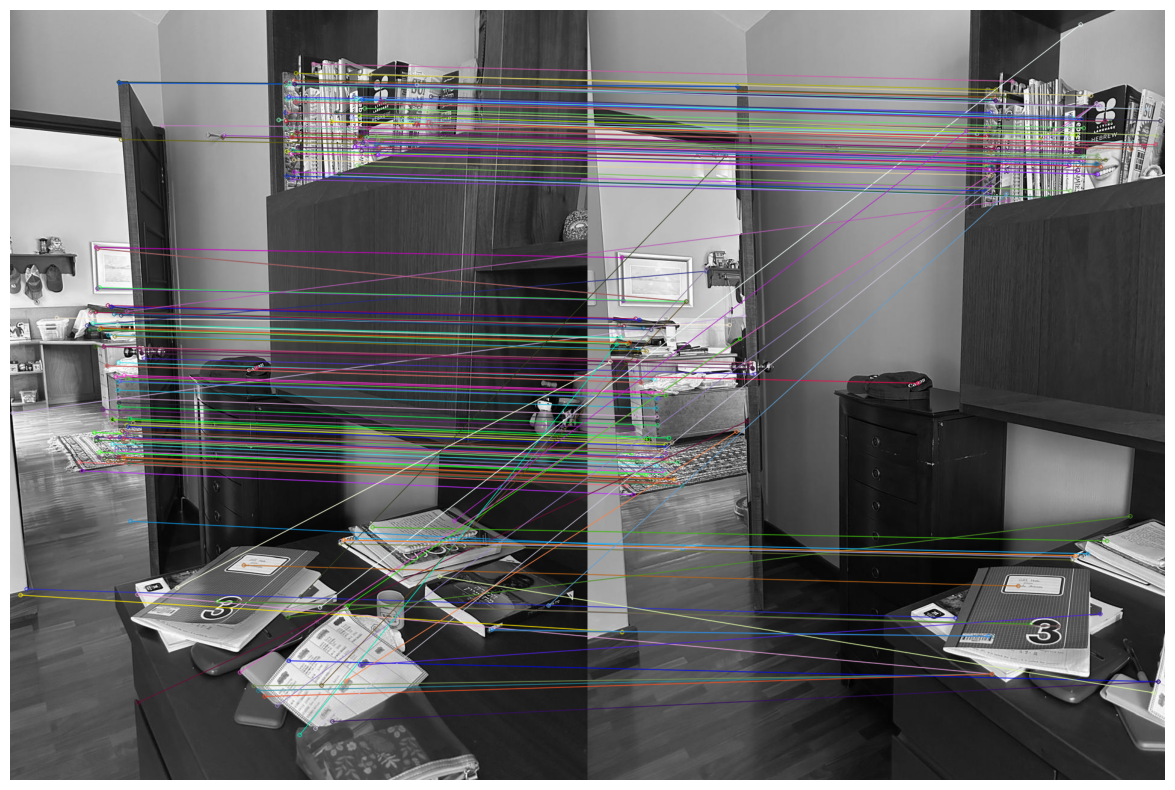

In [18]:
# cargar las imágenes
img_left = cv2.imread("exp1.jpeg")
img_right = cv2.imread("exp2.jpeg")

# convertir en grises
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# SIFT para detectar keypoints
sift = cv2.SIFT_create()
kp_left, des_left = sift.detectAndCompute(gray_left, None) #Train (destino)
kp_right, des_right = sift.detectAndCompute(gray_right, None) #Query (origen)

# Matching Flann
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# derecha es query
# izquierda es nuestro train
matches = flann.knnMatch(des_right, des_left, k = 2)
print(len(matches)) # son como 10 000 matches 

# lowe ratio test
good_matches = []
for m, n in matches: 
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Matches buenos encontrados {len(good_matches)}")

# visualización
img_matches = cv2.drawMatches(gray_right, kp_right, gray_left, kp_left, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.axis('off')
plt.show()  

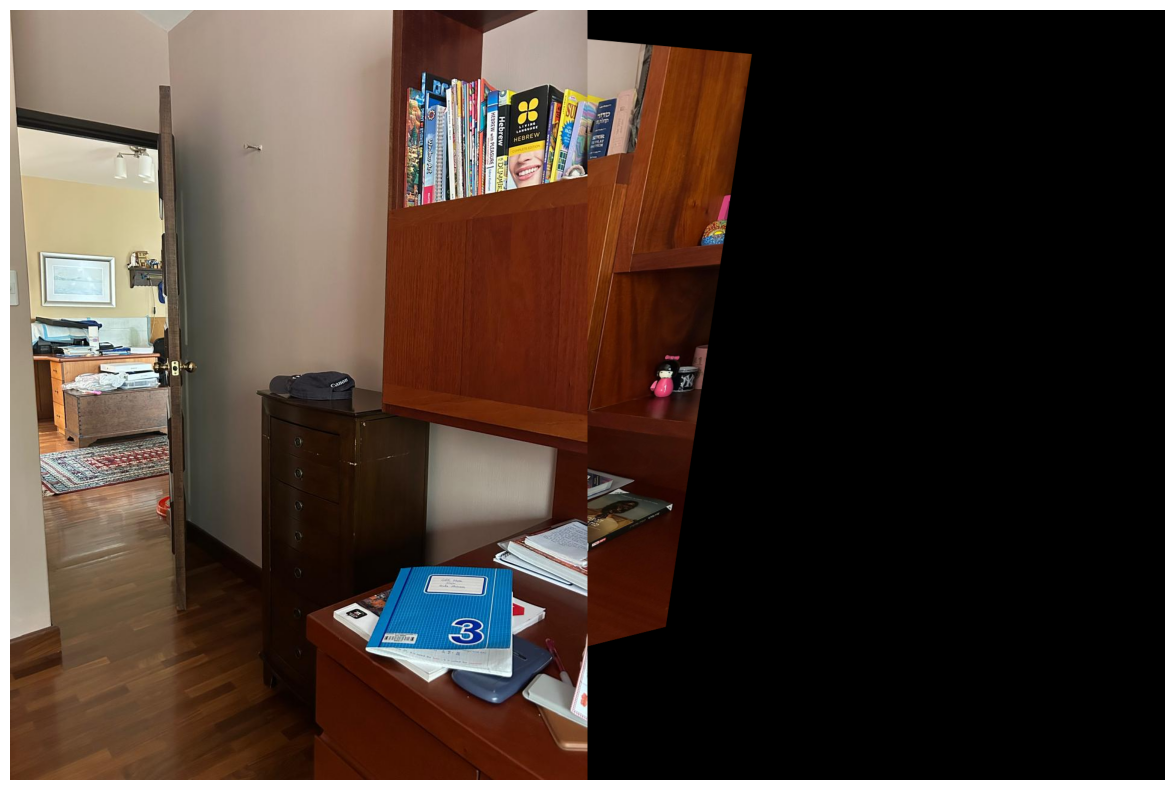

In [19]:
# homografía 

# extraer coordenadas de lso puntos 
src_pts = np.float32([kp_right[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_left[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# ransac
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# wrap * deformación
# calcular nuestro canvas / lienzo
h_left, w_left = img_left.shape[:2]
h_right, w_right = img_right.shape[:2]

# ancho = i1.w + i2.w
canvas_w = w_left + w_right
canvas_h = max(h_left, h_right)

# deformamos la imagen de la derecha. Como la base es la izquiera, la derecha se moverá hacia coorddenadas positivas
panorama = cv2.warpPerspective(img_right, M, (canvas_w, canvas_h))
panorama[0:h_left, 0:w_left] = img_left

dst_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off')
plt.show()

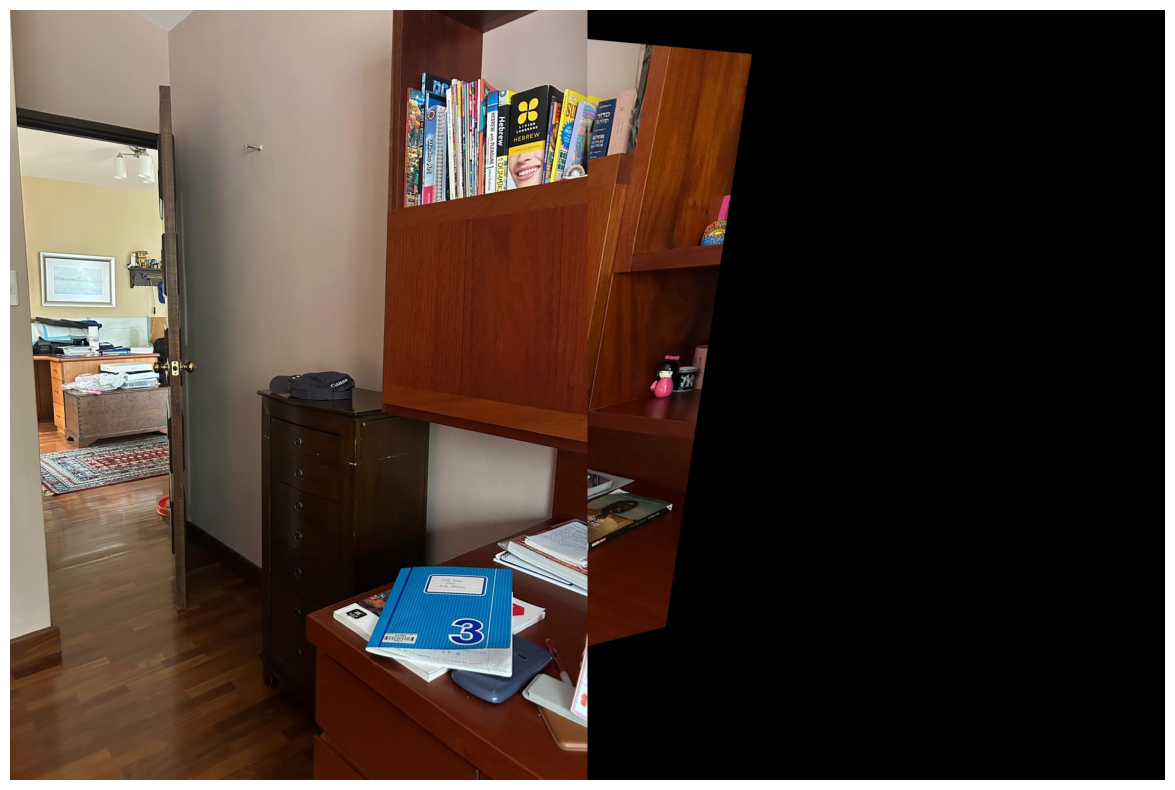

In [20]:
panorama_gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(panorama_gray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
left_on_canvas = np.zeros_like(panorama)
left_on_canvas[0:h_left, 0:w_left] = img_left

img_left_part = cv2.bitwise_and(left_on_canvas, left_on_canvas, mask=mask_inv)
img_panorama_part = cv2.bitwise_and(panorama, panorama, mask=mask)
final_panorama = cv2.add(img_left_part, img_panorama_part)

dst_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off') 
plt.show()

Se puede ver que por el paralaje, la foto no se alinea bien. 